In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint



In [15]:
wash_weather_data = pd.read_csv("WashingtonDataCenter.csv")
weather_data.dtypes
# dfST['timestamp'] = pd.to_datetime(dfST['timestamp'])
wash_weather_data["Date"] = pd.to_datetime(weather_data["Date"]).dt.strftime('%m/%d/%y')

ice_weather_data = pd.read_csv("ReykjavikIcelandDataCenter.csv")
ice_weather_data["Date"] = pd.to_datetime(weather_data["Date"]).dt.strftime('%m/%d/%y')


bitcoin = pd.read_csv("BTC-USD.csv")
bitcoin["Date"] = pd.to_datetime(bitcoin["Date"]).dt.strftime('%m/%d/%y')
# bitcoin["Date"] = pd.to_datetime(bitcoin["Date"]).dt.strftime('%Y-%m')
# bitcoin.drop_duplicates(subset=['Date'], keep='last', inplace=True)

weather_df = pd.merge(wash_weather_data, ice_weather_data, how="inner", on="Date")
weather_df.rename(columns = {'Max Temp_x':'Max Temp Washington', 'Avg Temp_x':'Avg Temp Washington', 'Min Temp_x':'Min Temp Washington','Max Temp_y':'Max Temp Reykjavik', 'Avg Temp_y':'Avg Temp Reykjavik', 'Min Temp_y':'Min Temp Reykjavik'}, inplace = True)

bit_weather_df = pd.merge(weather_df, bitcoin, how="inner", on="Date")
bit_weather_df

,Date,Max Temp Washington,Avg Temp Washington,Min Temp Washington,Max Temp Reykjavik,Avg Temp Reykjavik,Min Temp Reykjavik,Open,High,Low,Close,Adj Close,Volume
0,01/01/17,28.4,17.6,3.2,57.2,53.6,48.2,963.658020,1003.080017,958.698975,998.325012,998.325012,1.477750e+08
1,08/01/17,91.4,78.8,53.6,33.8,32.0,28.4,2871.300049,2921.350098,2685.610107,2718.260010,2718.260010,1.324670e+09
2,01/01/18,39.2,33.8,24.8,57.2,53.6,48.2,14112.200200,14112.200200,13154.700200,13657.200200,13657.200200,1.029120e+10
3,08/01/18,86.0,75.2,51.8,32.0,32.0,30.2,7769.040039,7769.040039,7504.950195,7624.910156,7624.910156,4.797620e+09
4,01/01/19,39.2,33.8,24.8,57.2,53.6,48.2,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4.324201e+09
5,08/01/19,86.0,75.2,50.0,35.6,33.8,32.0,10077.442380,10446.919920,9922.019531,10399.668950,10399.668950,1.716534e+10
6,01/01/20,33.8,30.2,19.4,55.4,53.6,48.2,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,1.856566e+10
7,08/01/20,82.4,73.4,50.0,32.0,30.2,28.4,11322.570310,11794.775390,11239.682620,11759.592770,11759.592770,2.607567e+10
8,01/01/21,35.6,32.0,21.2,53.6,51.8,46.4,28994.009770,29600.626950,28803.585940,29374.152340,29374.152340,4.073030e+10
9,08/01/21,91.4,82.4,55.4,35.6,32.0,30.2,41460.843750,42541.679690,39540.941410,39974.894530,39974.894530,2.668844e+10


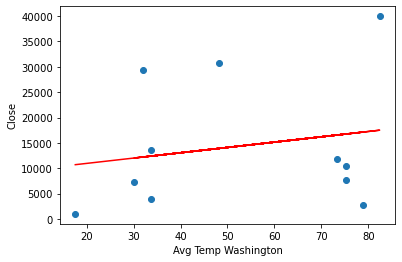

The correlation between both factors is 0.2


In [20]:
x_values = bit_weather_df['Avg Temp Washington']
y_values = bit_weather_df['Close']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,25),fontsize=10,color="red")
plt.xlabel('Avg Temp Washington')
plt.ylabel('Close')

plt.show()

correlation = st.pearsonr(bit_weather_df['Avg Temp Washington'],bit_weather_df['Close'])
print(f"The correlation between both factors is {round(correlation[0],2)}")